#Importações


In [2]:
import numpy as np
import scipy as sp
import future as ft
import sklearn
from scipy.io import arff
import pandas as pd

#instalações
!pip install scikit-multilearn
!pip install liac-arff # for loading ARFF files
!pip install iterative-stratification 
!pip install missingpy


#importações poś-intalações
from skmultilearn.dataset import load_dataset
import arff


#Lendo datasets originais do Repositório Mulan





In [3]:
def load_dataset(dataset_name):
  from skmultilearn.dataset import load_dataset
  X,y,feature_names, label_names = load_dataset(dataset_name, 'undivided')
  return X.toarray(),y.toarray(),feature_names, label_names

In [4]:
##ordem dos dados (X,y,features e labels)
data = load_dataset('emotions')

emotions:undivided - does not exists downloading
Downloaded emotions-undivided


In [5]:
X = data[2]
X

[('Mean_Acc1298_Mean_Mem40_Centroid', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Rolloff', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Flux', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_0', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_1', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_2', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_3', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_4', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_5', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_6', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_7', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_8', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_9', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_10', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_11', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_12', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Centroid', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Rolloff', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Flux', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_MFCC_0', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_MFCC_1', 'NUM

In [6]:
def counter(y):
  from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
  from collections import Counter
  distribuicao_labels = Counter(combination for row in get_combination_wise_output_matrix(y, order=1) for combination in row)
  return distribuicao_labels


In [7]:
#counter(data[1])




## Aplicando Validação Cruzada k-fold 
Testes iniciais com 10-folds

In [8]:
#X,y in numpy format
def cross_validation(X,y,num_folds, randon_state=0):
  from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
  mskf = MultilabelStratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)
  for train_index, test_index in mskf.split(X, y):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
  return X_train, X_test, y_train, y_test

In [9]:
data_train_and_test = cross_validation(data[0], data[1],10)

In [10]:
X_train = data_train_and_test[0]
X_test = data_train_and_test[1]
y_train = data_train_and_test[2]
y_test = data_train_and_test[3]

#Exibindo informações do dataset trabalhado

In [11]:
#verificando a presença de valores ausentes
def missing_values(df):
  amount = (df.isna().sum()).sum()
  return amount



In [12]:
valores_ausentes = missing_values(pd.DataFrame(X_train))
valores_ausentes

0

In [13]:
#padronização Dataset de teste
#X in numpy format
def padronizacao(X):
  from sklearn.preprocessing import StandardScaler
  scl = StandardScaler()
  X_scaler = scl.fit_transform(X)
  return X_scaler



In [14]:
X_test_scaler = padronizacao(X_test)
X_test_scaler

array([[-0.52751657, -0.7163883 ,  1.21315006, ..., -0.04586578,
        -0.22651953, -0.60392646],
       [-0.15986713, -0.37935696, -0.83883174, ...,  1.14280483,
         0.3797663 ,  0.38762244],
       [ 2.04640878,  1.25442176,  1.24451415, ..., -1.00563697,
        -0.19717983, -0.87608304],
       ...,
       [-0.96235614, -1.02193939, -0.6029958 , ..., -0.76221794,
        -0.88382307, -0.78601863],
       [ 1.4356929 ,  0.61769484,  1.20874808, ...,  0.29080106,
         1.34725769,  0.49765303],
       [-0.89368062, -1.08026503, -0.36782015, ..., -0.88947997,
         0.12370162, -0.67435006]])

#Amputando dataset

*   Mecanismo VA: MCAR



Quantificando os percentuais de valores ausentes de acordo com cada database

In [15]:
#retorna um lista com as posições com Valores ausentes e o dataset amputado
def amputation(rate, X):
  from numpy import random

  amount_missing_values = int(X.size * rate)
  print('Total dados: '+str(X.size)+'\n Total VAs: '+str(amount_missing_values)+'\n')

  rows = X.shape[0]
  cols = X.shape[1]
  index_list = []
  df = pd.DataFrame(X)

  while(len(index_list)<amount_missing_values):
    a = 0
    b = 0
    row = random.randint(0,rows)
    col = random.randint(0,cols)
    if(a != row and b != col):
      a = row
      b = col
      df.iloc[row,col] = np.nan
      index_list.append([row,col])
  return df, index_list

In [16]:
a = amputation(0.25, X_train)


Total dados: 38160
 Total VAs: 9540



In [17]:
a[0]

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,NaN,0.041426,...,0.070075,NaN,0.295031,70.0,0.276366,140.0,2.0,NaN,0.276366,0.710924
2,0.110545,0.273567,NaN,NaN,NaN,0.639047,NaN,NaN,0.489412,0.627636,...,NaN,0.085821,0.161574,NaN,0.000000,183.0,3.0,NaN,0.045941,0.457372
3,0.042481,NaN,NaN,NaN,5.824409,NaN,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,NaN,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,NaN,0.189988,0.029308,100.0,NaN,200.0,2.0,NaN,0.310801,0.683817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.027142,0.047551,0.072043,-79.881347,NaN,1.927310,1.696017,0.397888,0.857559,0.302742,...,0.129552,0.106260,NaN,87.0,0.564842,174.0,2.0,0.261742,0.002657,1.149211
526,0.094829,0.204498,0.082824,-61.364436,NaN,NaN,1.440352,0.856243,1.110282,0.394450,...,0.128090,0.167160,0.035827,65.0,0.003942,NaN,2.0,0.282122,0.052218,0.335371
527,0.035169,0.065403,0.075227,-81.750533,NaN,NaN,0.818851,1.569606,NaN,NaN,...,0.147194,0.098238,0.033681,88.0,0.000000,176.0,2.0,0.184313,0.247136,0.476993
528,0.054276,NaN,NaN,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,0.080006,NaN,0.155650,84.0,0.276695,168.0,2.0,0.547126,NaN,NaN


In [18]:
total_nan = (a[0].isnull().sum()).sum()
total_nan

8428

In [19]:
def grafic_bar_missing_values(df):
  import missingno as msno
  msno.bar(df)

In [20]:
def grafic_matrix_missing_values(df):
  import missingno as msno
  msno.matrix(df)

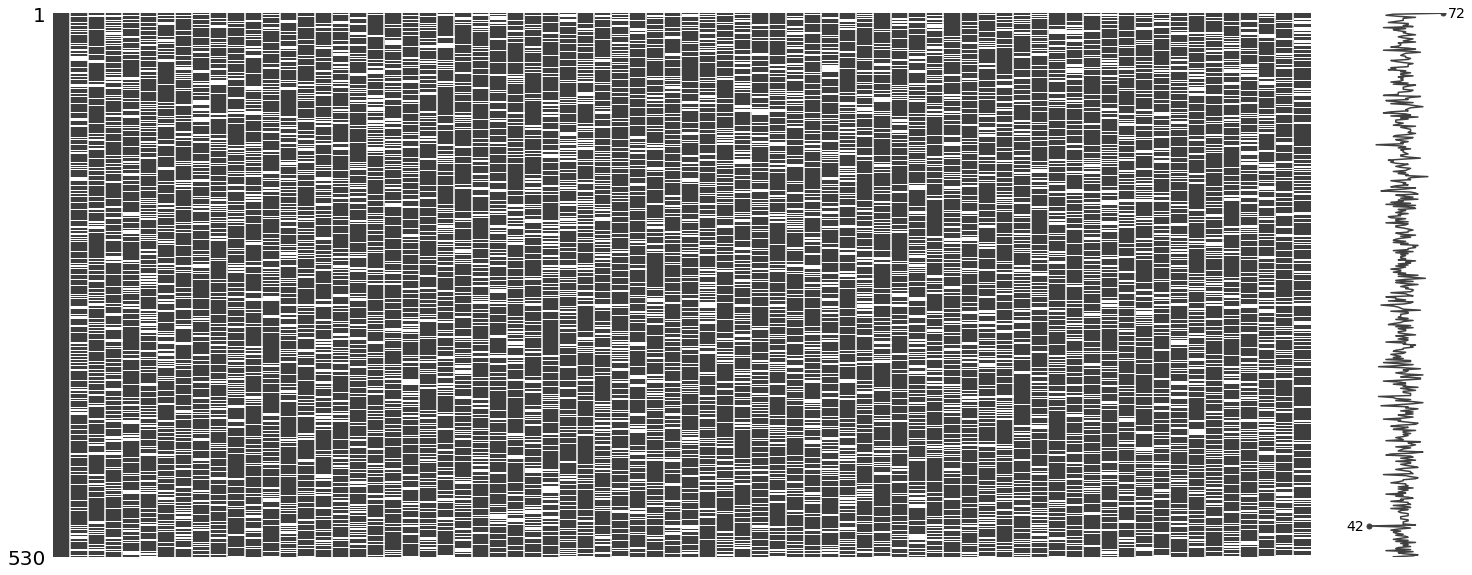

In [21]:
grafic_matrix_missing_values(pd.DataFrame(a[0]))

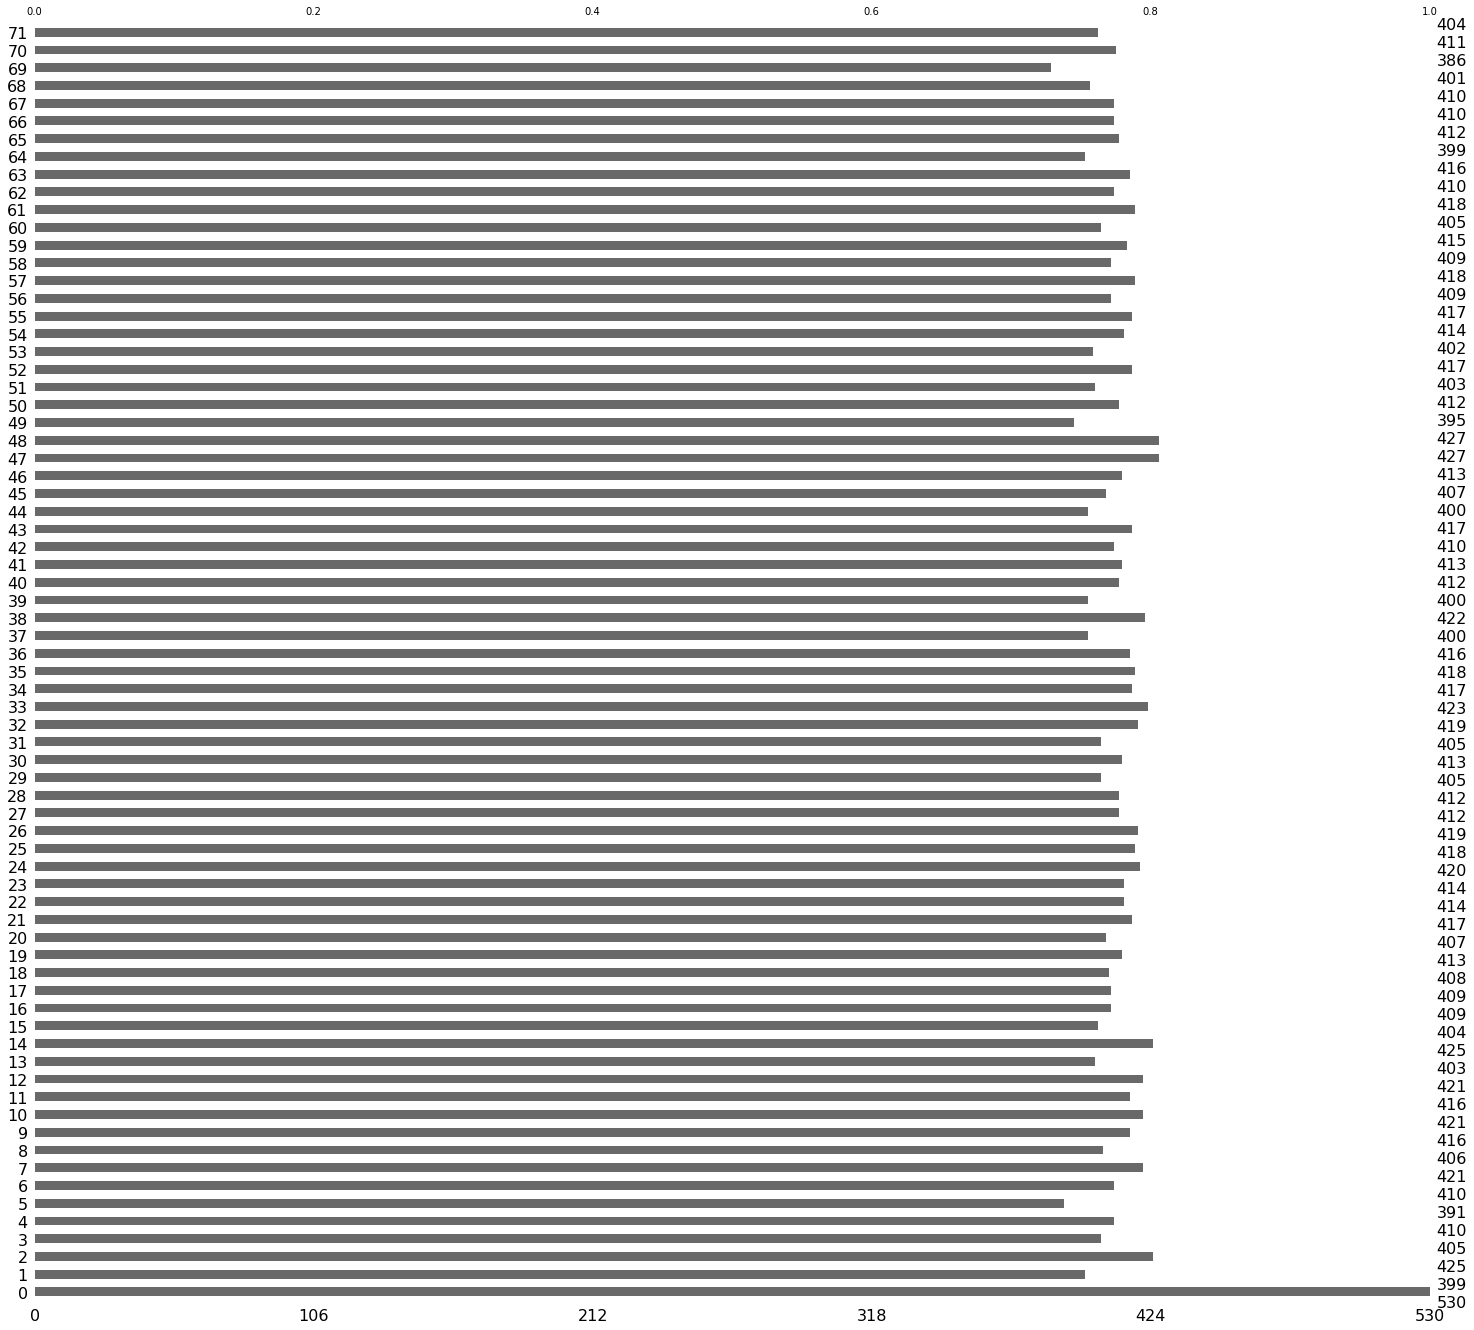

In [22]:
grafic_bar_missing_values(pd.DataFrame(a[0]))

In [23]:
def grafic_line_missing_values(df):
  import matplotlib.pyplot as plt 
  plt.figure(figsize=(20,3))
  plt.plot(df.isnull().sum(),marker='o')
  plt.title("Distribuição de Missing Values por features")
  plt.show()

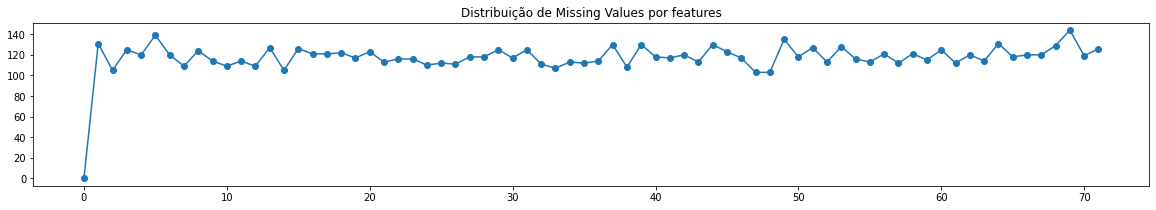

In [24]:
grafic_line_missing_values(pd.DataFrame(a[0]))

In [25]:
def describe(df):
  return df.describe()

In [26]:
describe(pd.DataFrame(data[0]))

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,0.109876,0.107114,0.230008,74.456998,0.247854,155.215852,2.099494,0.412940,0.354901,0.959906
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.053819,0.059361,0.295863,14.610203,0.366541,29.807954,0.316040,0.339559,0.362262,0.651827
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.032472,0.031945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,0.075211,0.071286,0.047611,64.000000,0.007556,132.000000,2.000000,0.179411,0.099424,0.513974
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,0.096668,0.088687,0.104043,71.000000,0.077408,150.000000,2.000000,0.309902,0.246193,0.804229
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,0.125772,0.121432,0.278203,84.000000,0.325489,180.000000,2.000000,0.529859,0.472593,1.242089
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,0.471506,0.415202,1.598533,115.000000,1.762948,237.000000,3.000000,1.795128,1.797765,3.422899


In [27]:
#Instalando o panda profile
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

#Imputação de dados


*   k-Nearest Neighbors (kNN) Imputation
*   mean
*   most_frequent
*   median







# Criação da popoulação inicial

imputando os indivíduos

In [28]:
#def knnImp(dataset_amputed):
#  from missingpy import KNNImputer
#  imputer_knn = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", 
#                 metric="masked_euclidean", row_max_missing=0.5, 
#                 col_max_missing=0.8, copy=True)
  
  #X_imputed_KNNI = imputer_knn.fit_transform(dataset_amputed)
  #return X_imputed_KNNI

In [29]:
from sklearn.impute import KNNImputer
def knnImp(dataset_amputed,neighbors):
  inputer_knn = KNNImputer(n_neighbors=neighbors)
  X_imputed_knn = inputer_knn.fit_transform(dataset_amputed)
  return X_imputed_knn

In [30]:
def rfImp(dataset_amputed):
  from missingpy import MissForest
  imputer_RFI = MissForest()
  X_imputed_RFI = imputer_RFI.fit_transform(dataset_amputed)
  return X_imputed_RFI

In [31]:
def meanImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_mean=imputer_mean.fit(dataset_amputed)
  X_imputed_mean = imputer_mean.transform(dataset_amputed)
  return X_imputed_mean

In [32]:
def mostFrequentImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_most_frequent=imputer_most_frequent.fit(dataset_amputed)
  X_imputed_most_frequent=imputer_most_frequent.transform(dataset_amputed)
  return X_imputed_most_frequent

In [33]:
def medianImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer_median=imputer_median.fit(dataset_amputed)
  X_imputed_median=imputer_median.transform(dataset_amputed)
  return X_imputed_median

In [34]:
def imputation(method, df):
  #import gerais
  import sklearn.neighbors._base
  import sys
  sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
  

  if method == 'mean':
    base_imputada = meanImp(df)
  elif method == 'median':
    base_imputada = medianImp(df)
  elif method == 'most_frequent':
    base_imputada = mostFrequentImp(df)
  elif method == 'knn-3':
    base_imputada = knnImp(df,3)
  elif method == 'knn-5':
    base_imputada = knnImp(df,5)
  elif method == 'knn-10':
    base_imputada = knnImp(df,10)
  return base_imputada


Padronização dos dados

In [35]:
imputation_meth  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
inds = []
df_amp = pd.DataFrame(a[0])
for i  in imputation_meth:
  inds.append(imputation(i,df_amp))

In [36]:
inds

[array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.474346  , 0.276366  ,
         0.710924  ],
        [0.110545  , 0.273567  , 0.094152  , ..., 0.378092  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.075227  , ..., 0.184313  , 0.247136  ,
         0.476993  ],
        [0.054276  , 0.19704233, 0.084736  , ..., 0.547126  , 0.58776933,
         0.732367  ],
        [0.073194  , 0.140733  , 0.080545  , ..., 0.23395967, 0.19878833,
         0.55921533]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.4828466, 0.276366 ,
         0.710924 ],
        [0.110545 , 0.273567 , 0.0894968, ..., 0.2929662, 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.247136 ,
         0.476993 ],
        [0.054276 , 0.200158 , 0.088

In [37]:
len(inds)

6

Normmalização da população inicial

In [38]:
populationInitial = inds
#for i in range(len(individuos)):
#  populationInitial.append(padronizacao(individuos[i]))

In [39]:
populationInitial

[array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.474346  , 0.276366  ,
         0.710924  ],
        [0.110545  , 0.273567  , 0.094152  , ..., 0.378092  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.075227  , ..., 0.184313  , 0.247136  ,
         0.476993  ],
        [0.054276  , 0.19704233, 0.084736  , ..., 0.547126  , 0.58776933,
         0.732367  ],
        [0.073194  , 0.140733  , 0.080545  , ..., 0.23395967, 0.19878833,
         0.55921533]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.4828466, 0.276366 ,
         0.710924 ],
        [0.110545 , 0.273567 , 0.0894968, ..., 0.2929662, 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.247136 ,
         0.476993 ],
        [0.054276 , 0.200158 , 0.088

In [40]:
inds[0].shape, populationInitial[0].shape

((530, 72), (530, 72))

In [41]:
X_train.shape, y_train.shape

((530, 72), (530, 6))

# Função Fitness

Os indivíduos da população são avaliados no aprendizado multirrótulo.
Neste experimento, serão testados algorítmos que transformam o problema e algorítmos que adaptam o problema.

accuracy_score = Exact Match\
a def acc_multilabel = acurácia para problemas multirrótulos

In [46]:
def acc_multilabel(y_true, y_pred):
  class_accuracies = []
  for class_ in np.unique(y_true):
    class_acc = np.mean(y_pred[y_true == class_] == class_)
    class_accuracies.append(class_acc)
  return np.mean(class_accuracies)

In [47]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def evaluation_binaryRelevance(core_algorithm, individual, metric = 'F1'):
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(classifier=SVC(C=50),require_dense=[False, True])#
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)

    F1 = f1_score(y_test, prediction_br, average='micro')
    ACC = accuracy_score(y_test, prediction_br)#EM
    ACC_ML = acc_multilabel(y_test, prediction_br)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    ACC = accuracy_score(y_test, prediction_br_RFC)
    ACC_ML = acc_multilabel(y_test, prediction_br_RFC)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br_RFC)
  elif core_algorithm == '3nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=3))
    classifier.fit(individual, y_train)
    prediction_br_3knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_3knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_3knn)
    ACC_ML = acc_multilabel(y_test, prediction_br_3knn)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br_3knn)
  elif core_algorithm == '5nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier())
    classifier.fit(individual, y_train)
    prediction_br_5knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_5knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_5knn)
    ACC_ML = acc_multilabel(y_test, prediction_br_5knn)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br_5knn)
  elif core_algorithm == '10nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=10))
    classifier.fit(individual, y_train)
    prediction_br_10knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_10knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_10knn)
    ACC_ML = acc_multilabel(y_test, prediction_br_10knn)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br_10knn) 
  elif core_algorithm == 'lr':
    from sklearn.linear_model import LogisticRegression
    classifier = BinaryRelevance(classifier = LogisticRegression())
    classifier.fit(individual, y_train)
    prediction_br_lr=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_lr, average='micro')
    ACC = accuracy_score(y_test, prediction_br_lr)
    ACC_ML = acc_multilabel(y_test, prediction_br_lr)#ACC MultiLabel
    HL = hamming_loss(y_test, prediction_br_lr)
  if metric == 'ACC':
    return  ACC
  elif metric == 'ACC_ML':
    return ACC_ML
  elif metric == 'F1':
    return F1
  elif metric == 'HL':
    return HL


In [ ]:
#svm = evaluation_binaryRelevance('svm', populationInitial[0])
#knn3 = evaluation_binaryRelevance('3nn', populationInitial[0])
#knn5 = evaluation_binaryRelevance('5nn', populationInitial[0])
#knn10 = evaluation_binaryRelevance('10nn', populationInitial[0])
#rf = evaluation_binaryRelevance('randomForest', populationInitial[0])


In [ ]:
#print(svm, knn3, knn5,knn10, rf)

Não executando Random Forest devido também ser um algorítmo que funciona como bagging

In [48]:
def fitness(population,metric):
  metrica = []
  populacao = []
  aval_lista_descrecente = []
  aval_lista_crescente = []
  indivuduos = {}
  accuracy = {}
  print('tam_pop_atual: ',len(population))
  print('Avaliações com Binary Relevance\n')
  indexx = 0
  for i in range(len(population)):
    print('Individual - ',i)
    metrica.append(evaluation_binaryRelevance('svm', population[indexx], metric=metric))
    metrica.append(evaluation_binaryRelevance('randomForest', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('3nn', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('5nn', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('10nn', population[indexx],metric=metric))

    aval_lista_descrecente = sorted(metrica, reverse=True)
    aval_lista_crescente = sorted(metrica)

    melhor = aval_lista_descrecente[0]
    pior = aval_lista_crescente[0]

    populacao.append([melhor, population[indexx]])

    indivuduos[i] = melhor
    indexx = indexx+1
    print('Pior:', pior, ' melhor (escolhido):', melhor)
    print('----------------------------------------------------')
    melhor = ''
    pior = ''
    aval_lista_descrecente = []
    aval_lista_crescente = []
    metrica = []
  return populacao



In [49]:
populacao_inicial_avaliada = fitness(populationInitial,'ACC_ML')

tam_pop_atual:  6
Avaliações com Binary Relevance

Individual -  0
Pior: 0.6254748982360923  melhor (escolhido): 0.7774762550881953
----------------------------------------------------
Individual -  1
Pior: 0.6341248303934871  melhor (escolhido): 0.7632632293080055
----------------------------------------------------
Individual -  2
Pior: 0.621540027137042  melhor (escolhido): 0.7795793758480326
----------------------------------------------------
Individual -  3
Pior: 0.6265264586160109  melhor (escolhido): 0.7795793758480326
----------------------------------------------------
Individual -  4
Pior: 0.5683853459972863  melhor (escolhido): 0.7541723202170963
----------------------------------------------------
Individual -  5
Pior: 0.6079036635006785  melhor (escolhido): 0.7611601085481683
----------------------------------------------------


In [50]:
populacao_inicial_avaliada

[[0.7774762550881953,
  array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
          0.405399  ],
         [0.081374  , 0.272747  , 0.085733  , ..., 0.474346  , 0.276366  ,
          0.710924  ],
         [0.110545  , 0.273567  , 0.094152  , ..., 0.378092  , 0.045941  ,
          0.457372  ],
         ...,
         [0.035169  , 0.065403  , 0.075227  , ..., 0.184313  , 0.247136  ,
          0.476993  ],
         [0.054276  , 0.19704233, 0.084736  , ..., 0.547126  , 0.58776933,
          0.732367  ],
         [0.073194  , 0.140733  , 0.080545  , ..., 0.23395967, 0.19878833,
          0.55921533]])],
 [0.7632632293080055,
  array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
          0.405399 ],
         [0.081374 , 0.272747 , 0.085733 , ..., 0.4828466, 0.276366 ,
          0.710924 ],
         [0.110545 , 0.273567 , 0.0894968, ..., 0.2929662, 0.045941 ,
          0.457372 ],
         ...,
         [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.

# Elitismo
O melhor individuo é passado para a proxima geracao - Elitismo

In [51]:
def elitismo(populacao_avaliada):
  #ordena a população passada de forma descrescente
  populacao_ordenada  = sorted(populacao_avaliada, key=lambda x: x[0], reverse=True)
  elitista = populacao_ordenada[0]
  return elitista

In [52]:
elitista = elitismo(populacao_inicial_avaliada)

In [53]:
elitista

[0.7795793758480326,
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.3781286, 0.276366 ,
         0.710924 ],
        [0.110545 , 0.273567 , 0.0883457, ..., 0.2792487, 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.247136 ,
         0.476993 ],
        [0.054276 , 0.2385116, 0.0894163, ..., 0.547126 , 0.2384845,
         0.7354476],
        [0.073194 , 0.140733 , 0.080545 , ..., 0.3235382, 0.2392511,
         0.5761374]])]

# Seleção

O processo de seleçãp é dado por torneio, sorteando dois pais

In [54]:
import random
def selecao(pop_atual):
  sorteio1 = random.choice(range(len(pop_atual)))
  #print(sorteio1)
  sorteio2 = random.choice(range(len(pop_atual)))
  #print(sorteio2)
  pai1 = pop_atual[sorteio1]
  pai2 = pop_atual[sorteio2]
  #print(pai1[0])
  #print(pai2[0])

  if(pai1[0] >= pai2[0]):
    return pai1
  else:
    return pai2

#Cruzamento

Cruzamento de n-points

In [55]:
#indeces com a posição do valores ausentes
index_vas = a[1]

In [56]:
index_vas

[[513, 65],
 [322, 29],
 [237, 16],
 [115, 54],
 [473, 66],
 [482, 13],
 [152, 62],
 [448, 56],
 [265, 58],
 [162, 44],
 [80, 3],
 [227, 69],
 [278, 1],
 [454, 9],
 [237, 68],
 [191, 54],
 [310, 5],
 [393, 29],
 [510, 38],
 [247, 16],
 [203, 49],
 [251, 56],
 [276, 53],
 [86, 28],
 [160, 15],
 [271, 32],
 [444, 44],
 [176, 56],
 [223, 20],
 [104, 55],
 [393, 56],
 [209, 5],
 [91, 15],
 [508, 35],
 [375, 45],
 [330, 61],
 [398, 28],
 [448, 47],
 [508, 43],
 [440, 11],
 [497, 52],
 [191, 43],
 [520, 56],
 [351, 64],
 [407, 33],
 [301, 24],
 [392, 23],
 [100, 6],
 [33, 42],
 [320, 3],
 [449, 15],
 [386, 60],
 [30, 54],
 [39, 17],
 [415, 16],
 [231, 56],
 [266, 3],
 [434, 26],
 [412, 45],
 [143, 13],
 [295, 62],
 [209, 60],
 [432, 31],
 [213, 48],
 [514, 29],
 [299, 54],
 [85, 18],
 [43, 11],
 [98, 61],
 [165, 27],
 [146, 9],
 [186, 10],
 [481, 4],
 [310, 18],
 [172, 68],
 [195, 18],
 [341, 68],
 [60, 19],
 [234, 36],
 [280, 25],
 [321, 64],
 [69, 35],
 [249, 37],
 [490, 47],
 [168, 28],
 

In [57]:
def crossover(list_index_vas,n_points, new_population, tam_population):
  nova_populacao_com_crossover = []
  #elitista = new_population[0]
  #nova_populacao_com_crossover.append(elitista[1])

  while(len(nova_populacao_com_crossover)<tam_population):
    sorteio1 = random.choice(range(len(new_population)))
    #escolha dos pais que terão materiais trocados
    #print(sorteio1)
    sorteio2 = random.choice(range(len(new_population)))
    #print(sorteio2)
    while(sorteio1 == sorteio2):
      sorteio2 = random.choice(range(len(new_population)))
    pai1 = new_population[sorteio1]
    pai2 = new_population[sorteio2]

    df_pai1 = pd.DataFrame(pai1[1])
    df_pai2 = pd.DataFrame(pai2[1])
  
    genes_all_pai1 = []

    genes_all_pai2 = []

    #recuperando os genes de cada pai
    for i in list_index_vas:
      genes_all_pai1.append(df_pai1.iloc[i[0],i[1]])
      genes_all_pai2.append(df_pai2.iloc[i[0],i[1]])
    #dividindo os genes de acordo com o n_points
    divide_genes_pai_1 = np.array_split(genes_all_pai1,n_points)
    divide_genes_pai_2 = np.array_split(genes_all_pai2,n_points)

    genes_0_pai1 = divide_genes_pai_1[0]
    genes_1_pai1 = divide_genes_pai_1[1]

    genes_0_pai2 = divide_genes_pai_2[0]
    genes_1_pai2 = divide_genes_pai_2[1]

    t1 = len(genes_1_pai1)
    t2 = len(genes_1_pai2)

    divide_list_index = np.array_split(list_index_vas,n_points)
    primeira_parte = divide_list_index[0]
    segunda_parte = divide_list_index[1]

    genes_parte_2_pai1 = genes_1_pai1.tolist()
    genes_parte_2_pai2 = genes_1_pai2.tolist()

    #Trocando genes dos pais
    index = 0
    for i in segunda_parte:
      df_pai1.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai2[index]
      df_pai2.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai1[index]
      index = index +1
    filho1 = df_pai1
    filho2 = df_pai2
    nova_populacao_com_crossover.append(filho1.to_numpy())
    nova_populacao_com_crossover.append(filho2.to_numpy())
  #filho1, filho2,pai1[1],pai1[2]
  print('Tamanho da nova população gerada por meio do cruzamento:',len(nova_populacao_com_crossover))
  return nova_populacao_com_crossover

In [58]:
nova_populacao_recombinada = crossover(index_vas,2,populacao_inicial_avaliada,10)
nova_populacao_recombinada

Tamanho da nova população gerada por meio do cruzamento: 10


[array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.4828466, 0.276366 ,
         0.710924 ],
        [0.110545 , 0.273567 , 0.083762 , ..., 0.298304 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.247136 ,
         0.476993 ],
        [0.054276 , 0.169757 , 0.088491 , ..., 0.547126 , 0.247136 ,
         0.8039185],
        [0.073194 , 0.140733 , 0.080545 , ..., 0.298304 , 0.247136 ,
         0.5001736]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.298304 , 0.276366 ,
         0.710924 ],
        [0.110545 , 0.273567 , 0.0894968, ..., 0.2929662, 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.184313 , 0.247136 ,
         0.476993 ],
        [0.054276 , 0.200158 , 0.083762 , ..., 0.547126 , 0.3905182,
   

# Mutação

In [59]:
def mutacao(dX_amputed,ind, list_missing_values):
  import random
  #de numpy para pandas format
  ind = pd.DataFrame(ind)
  #serão selecionados x% de individuos da população e são trocadas todas as solucões
  #candidatas já imputadas por uma nova solução da pool de soluções
  #amount_inds_mutation = int(rate_mutation *  len(inds_pop))
  for i in list_missing_values:
    #criando um pool solutions de acordo com a o valor de x da lista de index
    lista_do_indice_atual = dX_amputed.iloc[:,i[1]]
    #removendo o indices NaN para criar a pool solutions só com soluções candatas não-nulas
    pool_solutions = [x for x in lista_do_indice_atual if pd.isnull(x) == False]
    #substituindo o gene do indivíduo por um dos genes da pool solutions
    #print('index: ', i[0],',', i[1])
    #print('antes: ',ind.iloc[i[0],i[1]])
    ind.iloc[i[0],i[1]] = random.choice(pool_solutions)
    #print('depois: ',ind.iloc[i[0],i[1]])
  return ind.to_numpy()

In [ ]:
#ind = mutacao(df_amp)

In [65]:
def mutations(dX_amputed,population, rate_mutation,list_missing_values):
  populacao_cruzada = population.copy()
  amount_inds_mutation = int(rate_mutation *  len(populacao_cruzada))
  i = 0
  while(i < amount_inds_mutation):
    ind_escolhido_pra_mutacao = populacao_cruzada.pop(i)
    ind_mutado = mutacao(dX_amputed, ind_escolhido_pra_mutacao,list_missing_values)
    populacao_cruzada.append(ind_mutado)
    i=i+1
  return populacao_cruzada

# Algoritmo Genético



1.   elitisimo: 1
2.   gerações: 6
3.   geracoes_sizes{6,12,18,24,30}
4.   cruzamento: n-points
5.   cruzamento: torneio



In [60]:
def nova_populacao(df_amp,individuo_elitista, pop_atual, tam_population,n_points, list_index_vas=index_vas):
  formacao_nova_populacao = []
  formacao_nova_populacao.append(individuo_elitista)
  while(len(formacao_nova_populacao)<= tam_population):
    formacao_nova_populacao.append(selecao(pop_atual))
  #pega a população selecionada para fazer a recombinação
  nova_populacao_combinada = crossover(list_index_vas,n_points, formacao_nova_populacao, tam_population)
  #20% dos individuos sofrem mutações
  #a nova populacao combinada é passada como parametro
  populacao_cruzada_e_mutada = mutations(df_amp,nova_populacao_combinada, 0.20,list_index_vas)

  return populacao_cruzada_e_mutada

# Benckmarking Experimental

In [61]:
#dados = ['a','b','c','d','e']
#dados_ = ['1','1','1','1','1']
def _geracoes_results(dados,name_file,dataset, missing_values_rate):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n'+str(dataset)+'_mv_'+str(missing_values_rate)+' ')
    for i in dados:
      arquivo.write(' '+str(i)+' ')



In [62]:
#_geracoes_results(dados, 'a.txt','dataset',0.05)

In [63]:
def results_exp(name_file,algorithm,dataset_name, vas, metric,dado):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n'+str(algorithm)+'_'+dataset_name+'_'+str(vas)+'_'+metric+' '+dado)

In [ ]:
def otimizacao(geracoes,populacao_inicial,elitista,metric,dataset_amputado, missing_values_rate,dataset_name):
  melhores_por_geracao = []
  for p in [8,10,12,14,16,18]:
    melhor = elitista
    melhores_por_geracao.append(melhor)
    print('tamanho da população atual',len(populacao_inicial))
    #Cria nova populacao
    n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)
    #avalia populacao formada
    populacao_atual_avaliada = fitness(n_pop,metric=metric)
    #print(n_pop[0])
    #passando o melhor elitista
    #print(melhor)
    populacao_inicial = []
    melhor_atual  = elitismo(populacao_atual_avaliada)
    if (melhor_atual[0]>melhor[0]):
      melhores_por_geracao.append(melhor_atual)
      #populacao_inicial.append(melhor_atual)
      melhor = melhor_atual
      print('Novo melhor:',melhor_atual[0])
    else:
      populacao_atual_avaliada.pop(len(populacao_atual_avaliada)-1)
      melhores_por_geracao.append(melhor)
      populacao_inicial.append(melhor)
      print('melhor anterior foi escolhido: ',melhor[0])
    populacao_inicial.extend(populacao_atual_avaliada)
    print(len(populacao_inicial))
    re = melhores_por_geracao
    res = melhores_por_geracao[len(melhores_por_geracao)-1]
    print('Melhor encontrado: ',melhores_por_geracao[len(melhores_por_geracao)-1])
    r = []
    for x in re:
      r.append(str(x[0]))
    print('tamanho da poppop',len(r) )
    #file_name = dataset_name+'_'+str(missing_values_rate)+'.txt'
    _geracoes_results(r,'geracoes_ag.txt',dataset_name,str(missing_values_rate))
    return res[0]#,res[1]

In [66]:
geracoes = [8,10,12,14,16,18] # 7-geracoes(com a populacao inicial)
rates_missing_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
imputation_methods  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
#lendo datasets via scikit-multilearning
dataset_name = 'emotions'
metric='ACC_ML'
dataset = load_dataset(dataset_name)
X = dataset[0]
y = dataset[1]
#Aplicando validação cruzada do tipo K-folds - (10-folds)
data_validations = cross_validation(X,y,10)
X_train = data_validations[0]
X_test = data_validations[1]
y_train = data_validations[2]
y_test = data_validations[3]
#verificando missing values 
#missing_values =missing_values(pd.DataFrame(X_train))
#Amputação de dados
accuracy = []
for i in rates_missing_values:
  dados_amputacao = amputation(i, X_train)
  lista_indices_amputados = dados_amputacao[1]
  dataset_amputado = dados_amputacao[0]
  #imputação para formação da população incial
  individuos = []
  for j  in imputation_methods:
    individuos.append(imputation(j,dataset_amputado))
  #========================================================================
  #Fazendo experimentos com a média dos avaliações para SVM e Random Forest
  #para cada imputação simples realizada na população inicial é feito um experimento
  #com RF e SVM o valor utilizado é a média do desempenho da classificação
  #dessa forma é possivel considerar todas as formas de imputação para os 
  #classificados bases utilizados 
  #========================================================================
  bases_completas = individuos
  avalicoes_inds_rf = []
  avalicoes_inds_svm = []
  for l in range(len(bases_completas)):
    avalicoes_inds_rf.append(evaluation_binaryRelevance('randomForest', bases_completas[l], metric=metric))
    avalicoes_inds_svm.append(evaluation_binaryRelevance('svm', bases_completas[l],metric=metric))
  #print(avalicoes_inds_rf) 
  #print(avalicoes_inds_svm)

  print('media Random Forest: ',np.mean(np.array(avalicoes_inds_rf)) ) 
  print('media SVM: ',np.mean(np.array(avalicoes_inds_svm) )) 

  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_ACCML.txt', 'SVM',dataset_name, i, metric,str(np.mean(np.array(avalicoes_inds_svm))))
  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_ACCML.txt', 'RF',dataset_name, i, metric,str(np.mean(np.array(avalicoes_inds_rf))))

  #========================================================================
  #Fazendo experimentos com o Algoritmo Genético
  #========================================================================
  populationInitial = individuos
  #avaliando a pupolução inicial e ordenada (DESC) e avaliando com a acurácia
  populacao_avaliada = fitness(populationInitial,metric)
  #elitismo
  elitista = elitismo(populacao_avaliada)
  #iniciando o processo de otimização (criterio de parada é determinado pelas gerações)
  populacao_inicial = populacao_avaliada
  melhor = elitista
  melhores_por_geracao = []
  melhores_por_geracao.append(melhor[0])
  for p in [8,10,12,14,16,18]:
    print('p: ',p)
    n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)
    populacao_atual_avaliada = fitness(n_pop,metric=metric)
    populacao_inicial = []
    melhor_atual  = elitismo(populacao_atual_avaliada)
    if (melhor_atual[0]>melhor[0]):
      melhores_por_geracao.append(melhor_atual[0])
      #populacao_inicial.append(melhor_atual)
      melhor = melhor_atual
      print('Novo melhor:',melhor_atual[0])
    else:
      #melhor = melhor
      populacao_atual_avaliada.pop(len(populacao_atual_avaliada)-1)
      melhores_por_geracao.append(melhor[0])
      populacao_inicial.append(melhor)
      print('melhor anterior foi escolhido: ',melhor[0])
    populacao_inicial.extend(populacao_atual_avaliada)
  _geracoes_results(melhores_por_geracao,'/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/geracoes_agACCML.txt',dataset_name,str(i))
  print('melhores por geracao',len(melhores_por_geracao))
  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_ACCML.txt', 'AG',dataset_name, i, metric,str(melhores_por_geracao[len(melhores_por_geracao)-1]))
  melhores_por_geracao = []
    



  #z = otimizacao(geracoes=geracoes, populacao_inicial=populacao_inicial, elitista=elitista,metric='ACC', dataset_amputado=dataset_amputado,missing_values_rate=i,dataset_name=dataset_name)
  #
  #z = ''

emotions:undivided - exists, not redownloading
Total dados: 38160
 Total VAs: 1908

media Random Forest:  0.7882236544549976
media SVM:  0.6540366350067842
tam_pop_atual:  6
Avaliações com Binary Relevance

Individual -  0
Pior: 0.6132632293080054  melhor (escolhido): 0.7932157394843962
----------------------------------------------------
Individual -  1
Pior: 0.61780868385346  melhor (escolhido): 0.7702510176390773
----------------------------------------------------
Individual -  2
Pior: 0.6151289009497964  melhor (escolhido): 0.7729308005427409
----------------------------------------------------
Individual -  3
Pior: 0.6068521031207599  melhor (escolhido): 0.7857530529172321
----------------------------------------------------
Individual -  4
Pior: 0.6023066485753052  melhor (escolhido): 0.7750339213025781
----------------------------------------------------
Individual -  5
Pior: 0.6023066485753052  melhor (escolhido): 0.7948439620081411
--------------------------------------------

# Graficos Resultantes 

## Gerações

In [89]:
df_emotions_geracoes_accML = pd.DataFrame()
with open('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/geracoes_agACCML.txt', 'r') as file:
  for vals in file:
    if vals != '':
      instancias = vals.split()
      if len(instancias) > 0:
        col = instancias.pop(0)
        df_emotions_geracoes_accML[str(col)] = instancias
        print(len(instancias))

    


7
7
7
7
7
7


In [90]:
df_emotions_geracoes_accML

,emotions_mv_0.05,emotions_mv_0.1,emotions_mv_0.15,emotions_mv_0.2,emotions_mv_0.25,emotions_mv_0.3
0,0.7948439620081411,0.7932157394843962,0.7932157394843962,0.7932157394843962,0.7836499321573949,0.7683853459972863
1,0.7948439620081411,0.7977611940298508,0.7932157394843962,0.8068521031207598,0.7985753052917233,0.7713025780189959
2,0.7948439620081411,0.7977611940298508,0.7932157394843962,0.8068521031207598,0.7985753052917233,0.7814450474898236
3,0.7948439620081411,0.7977611940298508,0.7969470827679783,0.8068521031207598,0.7985753052917233,0.7814450474898236
4,0.7948439620081411,0.7977611940298508,0.7969470827679783,0.8068521031207598,0.7985753052917233,0.7814450474898236
5,0.8033582089552238,0.7977611940298508,0.7969470827679783,0.8068521031207598,0.7985753052917233,0.7814450474898236
6,0.8033582089552238,0.7977611940298508,0.7969470827679783,0.8068521031207598,0.7985753052917233,0.7913500678426051


In [91]:
df_emotions_geracoes_accML['5%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.05'])
df_emotions_geracoes_accML['10%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.1'])
df_emotions_geracoes_accML['15%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.15'])
df_emotions_geracoes_accML['20%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.2'])
df_emotions_geracoes_accML['25%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.25'])
df_emotions_geracoes_accML['30%'] = pd.to_numeric(df_emotions_geracoes_accML['emotions_mv_0.3'])

In [94]:
df_emotions_geracoes_accML = df_emotions_geracoes_accML.iloc[0:,6:]

In [95]:
df_emotions_geracoes_accML

,5%,10%,15%,20%,25%,30%
0,0.794844,0.793216,0.793216,0.793216,0.783650,0.768385
1,0.794844,0.797761,0.793216,0.806852,0.798575,0.771303
2,0.794844,0.797761,0.793216,0.806852,0.798575,0.781445
3,0.794844,0.797761,0.796947,0.806852,0.798575,0.781445
4,0.794844,0.797761,0.796947,0.806852,0.798575,0.781445
5,0.803358,0.797761,0.796947,0.806852,0.798575,0.781445
6,0.803358,0.797761,0.796947,0.806852,0.798575,0.791350


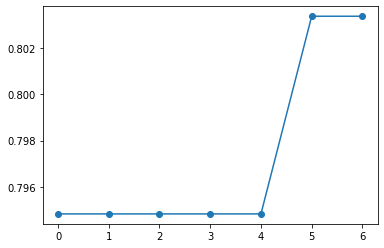

In [97]:
df_emotions_geracoes_accML['5%'].plot(style='.-',marker='o')

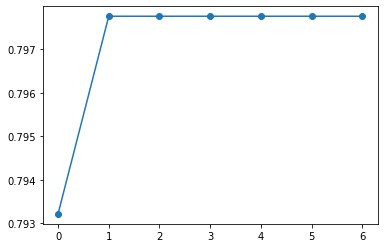

In [98]:
df_emotions_geracoes_accML['10%'].plot(style='.-',marker='o')

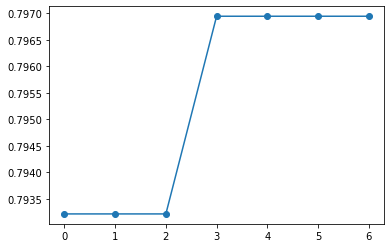

In [100]:
df_emotions_geracoes_accML['15%'].plot(style='.-',marker='o')

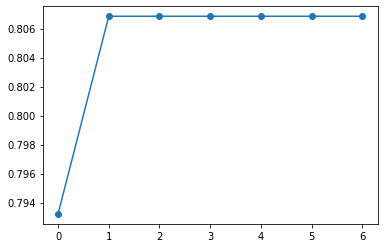

In [101]:
df_emotions_geracoes_accML['20%'].plot(style='.-',marker='o')

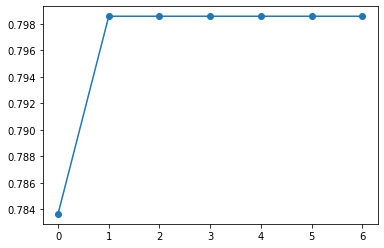

In [102]:
df_emotions_geracoes_accML['25%'].plot(style='.-',marker='o')

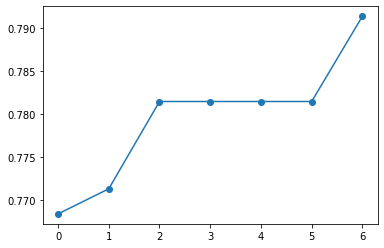

In [103]:
df_emotions_geracoes_accML['30%'].plot(style='.-',marker='o')

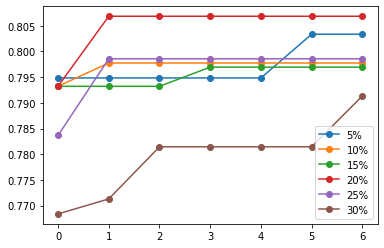

In [104]:
df_emotions_geracoes_accML.plot(style='.-',marker='o')

## Dados comparativos

In [107]:
with open('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_ACCML.txt','r') as resultados_finais_accML:
  print('Resultados comparativos para acurácia do tipo multilabel')
  print( 'O algoritmo Multilabel utilizado em ambos os experimentos foi o BR')
  for r in resultados_finais_accML:
    print(r)

Resultados comparativos para acurácia do tipo multilabel
O algoritmo Multilabel utilizado em ambos os experimentos foi o BR


SVM_emotions_0.05_ACC_ML 0.6540366350067842

RF_emotions_0.05_ACC_ML 0.7882236544549976

AG_emotions_0.05_ACC_ML 0.8033582089552238

SVM_emotions_0.1_ACC_ML 0.6459011759384894

RF_emotions_0.1_ACC_ML 0.780958842152872

AG_emotions_0.1_ACC_ML 0.7977611940298508

SVM_emotions_0.15_ACC_ML 0.6307892356399819

RF_emotions_0.15_ACC_ML 0.7782960199004975

AG_emotions_0.15_ACC_ML 0.7969470827679783

SVM_emotions_0.2_ACC_ML 0.6298959746720941

RF_emotions_0.2_ACC_ML 0.769125961103573

AG_emotions_0.2_ACC_ML 0.8068521031207598

SVM_emotions_0.25_ACC_ML 0.6200474898236092

RF_emotions_0.25_ACC_ML 0.7664235639981909

AG_emotions_0.25_ACC_ML 0.7985753052917233

SVM_emotions_0.3_ACC_ML 0.6017130257801899

RF_emotions_0.3_ACC_ML 0.7590852555404793

AG_emotions_0.3_ACC_ML 0.7913500678426051
